<a href="https://colab.research.google.com/github/Nashra-Tazmeen/Topic-Modelling-LDA/blob/main/Topic_Modelling_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Nashra-Tazmeen/Topic-Modelling-LDA.git

Cloning into 'Topic-Modelling-LDA'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 1), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (12/12), 1.83 MiB | 8.57 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
pip install pyLDAvis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.6 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

''' gensim'''
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from pprint import pprint

# ploting tools
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


In [ ]:
import pandas as pd
medium_articles=pd.read_csv("/content/Topic-Modelling-LDA/articles.csv")
medium_articles.head()

,author,claps,reading_time,link,title,text
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...


In [ ]:
medium_articles.shape

(337, 6)

In [ ]:
article_text = medium_articles.text
# visualise first article print few words from it
print("First 1000 words in first article are : \n",article_text[0][:1000])

First 1000 words in first article are : 
 Oh, how the headlines blared:
Chatbots were The Next Big Thing.
Our hopes were sky high. Bright-eyed and bushy-tailed, the industry was ripe for a new era of innovation: it was time to start socializing with machines.
And why wouldn’t they be? All the road signs pointed towards insane success.
At the Mobile World Congress 2017, chatbots were the main headliners. The conference organizers cited an ‘overwhelming acceptance at the event of the inevitable shift of focus for brands and corporates to chatbots’.
In fact, the only significant question around chatbots was who would monopolize the field, not whether chatbots would take off in the first place:
One year on, we have an answer to that question.
No.
Because there isn’t even an ecosystem for a platform to dominate.
Chatbots weren’t the first technological development to be talked up in grandiose terms and then slump spectacularly.
The age-old hype cycle unfolded in familiar fashion...
Expectat

In [ ]:
#total number of author
print(f"Total Number of unique authors : {len(medium_articles.author.unique())}")

Total Number of unique authors : 182


In [ ]:
article_counts=dict()
for author in medium_articles.author:
  article_count=len(medium_articles[medium_articles["author"]==author])
  article_counts[author]=article_count



In [ ]:
# Assuming article_counts is your dictionary
for key, value in article_counts.items():
    print(key, ":", value)



Justin Lee : 4
Conor Dewey : 3
William Koehrsen : 1
Gant Laborde : 3
Emmanuel Ameisen : 4
Irhum Shafkat : 3
Sam Drozdov : 2
Abhishek Parbhakar : 4
Aman Dalmia : 3
Sophia Arakelyan : 2
Dr. GP Pulipaka : 3
Scott Santens : 1
Adam Geitgey : 16
Xiaohan Zeng : 2
Gil Fewster : 4
David Venturi : 4
Michael Jordan : 3
Eran Kampf : 1
Oliver Lindberg : 2
Xu Wenhao : 1
Netflix Technology Blog : 5
Wolf Garbe : 1
Paul Christiano : 2
Robbie Tilton : 2
James Faghmous  : 2
Datafiniti : 3
Arjan Haring 🔮🔨 : 3
Eventbrite : 1
Akash Shende : 1
Hrishikesh Huilgolkar : 1
Shivon Zilis : 2
AirbnbEng : 2
Yingjie Miao  : 2
Pinterest Engineering : 2
Nikhil Dandekar : 1
Jeff Smith : 1
Chris Jagers : 1
John Wittenauer : 1
Christopher Nguyen : 1
Per Harald Borgen : 3
Ahmed El Deeb : 2
Matt Fogel : 1
Illia Polosukhin : 2
Christophe Bourguignat : 1
I'Boss Potiwarakorn : 1
samim : 2
Arthur Juliani : 10
Tal Perry : 3
Andrej Karpathy : 5
Vishal Maini : 4
Tim Anglade : 3
Sophia Ciocca : 2
Dhruv Parthasarathy : 6
Sebastian H

In [ ]:
article_counts = dict(sorted(article_counts.items(), key=lambda x: x[1], reverse=True))
article_counts

{'Adam Geitgey': 16,
 'Arthur Juliani': 10,
 'Slav Ivanov': 10,
 'Milo Spencer-Harper': 8,
 'Dhruv Parthasarathy': 6,
 'Netflix Technology Blog': 5,
 'Andrej Karpathy': 5,
 'Stefan Kojouharov': 5,
 'Sarthak Jain': 5,
 'Justin Lee': 4,
 'Emmanuel Ameisen': 4,
 'Abhishek Parbhakar': 4,
 'Gil Fewster': 4,
 'David Venturi': 4,
 'Vishal Maini': 4,
 'Blaise Aguera y Arcas': 4,
 'Eugenio Culurciello': 4,
 'Greg Fish': 4,
 'Max Pechyonkin': 4,
 'Conor Dewey': 3,
 'Gant Laborde': 3,
 'Irhum Shafkat': 3,
 'Aman Dalmia': 3,
 'Dr. GP Pulipaka': 3,
 'Michael Jordan': 3,
 'Datafiniti': 3,
 'Arjan Haring 🔮🔨': 3,
 'Per Harald Borgen': 3,
 'Tal Perry': 3,
 'Tim Anglade': 3,
 'Sebastian Heinz': 3,
 'Arvind N': 3,
 'Sam Drozdov': 2,
 'Sophia Arakelyan': 2,
 'Xiaohan Zeng': 2,
 'Oliver Lindberg': 2,
 'Paul Christiano': 2,
 'Robbie Tilton': 2,
 'James Faghmous ': 2,
 'Shivon Zilis': 2,
 'AirbnbEng': 2,
 'Yingjie Miao ': 2,
 'Pinterest Engineering': 2,
 'Ahmed El Deeb': 2,
 'Illia Polosukhin': 2,
 'samim': 

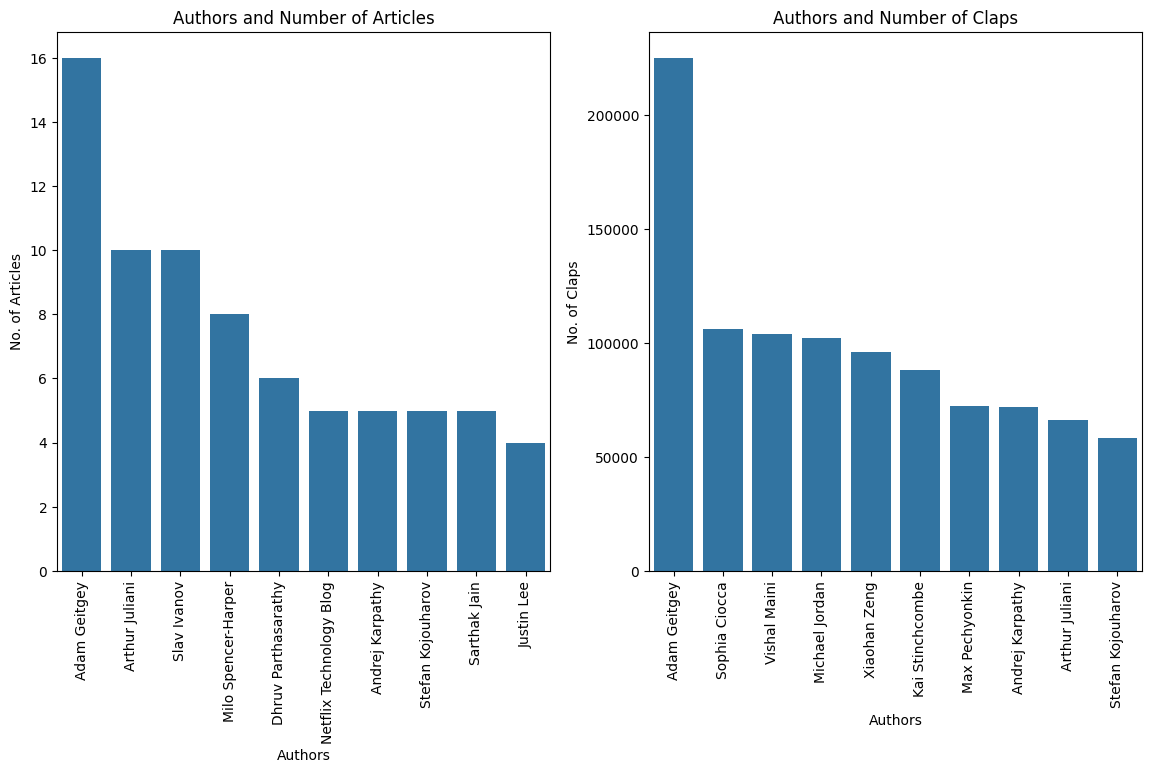

In [ ]:
import matplotlib.pyplot as plt
import re
import seaborn as sns
#plot histogram of top 10 authors and their article counts
plt.figure(figsize=(14,7))
plt.subplot(1, 2, 1)
sns.barplot(x = list(article_counts.keys())[:10],y=list(article_counts.values())[:10])
plt.title("Authors and Number of Articles")
plt.xlabel("Authors")
plt.ylabel("No. of Articles")
plt.xticks(rotation = 90)


def convert_to_num(clap_count):
    if "K" in clap_count:
        if "." in clap_count:
            clap_count = re.sub("\.","",clap_count[:-1])+"00"
        else:
            clap_count = clap_count[:-1]+"000"
    return(int(clap_count))


medium_articles.claps = medium_articles.claps.apply(convert_to_num)

#couting total number of claps for each author
clap_counts = dict()
for author in medium_articles.author:
    clap_count = medium_articles[medium_articles["author"]==author]["claps"]
    clap_counts[author] = sum(clap_count)

#sort clap_counts on the basis of counting of claps
clap_counts = dict(sorted(clap_counts.items(), key=lambda x: x[1], reverse=True))

#plot histogram of top 10 authors and their article counts
plt.subplot(1, 2, 2)
sns.barplot(x = list(clap_counts.keys())[:10],y=list(clap_counts.values())[:10])
plt.title("Authors and Number of Claps")
plt.xlabel("Authors")
plt.ylabel("No. of Claps")
plt.xticks(rotation = 90)
plt.show()


In [ ]:
#lowercase the articles
medium_articles.text = medium_articles.text.apply(lambda t : t.lower())

In [ ]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not",
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the text data
medium_articles.text = medium_articles.text.apply(lambda x:expand_contractions(x))


In [ ]:
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords dataset (you only need to do this once)
nltk.download('stopwords')

# Get the list of stopwords for a specific language (e.g., English)
stop_words = set(stopwords.words('english'))

# Now you can use the stop_words variable in your code


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words=stopwords.words('english')

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
print(f"These are the pucntions which string.punctuation consist :  {string.punctuation}")

These are the pucntions which string.punctuation consist :  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(article):
    "Return the articel after remvoing stopwords"
    article_tokens = word_tokenize(article)
    filtered_article = [word for word in article_tokens if not word in stop_words]
    return " ".join(filtered_article)

 #removing stopwords
medium_articles.text = medium_articles.text.apply(remove_stopwords)

#removing Punctuations
medium_articles.text = medium_articles.text.apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#removing digits
medium_articles.text = medium_articles.text.apply(lambda x: re.sub('\w*\d\w*','', x))

medium_articles.text[50]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


'upd  april      scikit flow merged tensorflow since version  called tensorflow learn tflearn  google released machine learning framework called tensorflow ’ taking world storm   stars github  lot publicity general excitement ai researchers   use something regular problem data scientist may   ai researcher — build interesting problems time   reasonable question  data scientist  already number tools toolbox  r  scikit learn  etc   care yet another framework  answer two part  let ’ start simple example — take titanic dataset kaggle  first  make sure installed tensorflow scikit learn helpful libs  including scikit flow simplifying lot work tensorflow  get dataset code http  githubcomilblackdragontfexamples quick look data  use ipython ipython notebook ease interactive exploration   let ’ test predict survived class  based float variables scikit learn  separate dataset features target  fill na data zeros build logistic regression  predicting training data gives us measure accuracy  cause ’

In [ ]:
def remove_extra_marks(article):
    extra_keys = ["’","—","”","“"]
    article_tokens = word_tokenize(article)
    filtered_article = [word for word in article_tokens if not word in extra_keys]
    return " ".join(filtered_article)

medium_articles.text = medium_articles.text.apply(remove_extra_marks)

In [ ]:
#printing arbitrary example to visulise clean data
medium_articles.text[50]

'upd april scikit flow merged tensorflow since version called tensorflow learn tflearn google released machine learning framework called tensorflow taking world storm stars github lot publicity general excitement ai researchers use something regular problem data scientist may ai researcher build interesting problems time reasonable question data scientist already number tools toolbox r scikit learn etc care yet another framework answer two part let start simple example take titanic dataset kaggle first make sure installed tensorflow scikit learn helpful libs including scikit flow simplifying lot work tensorflow get dataset code http githubcomilblackdragontfexamples quick look data use ipython ipython notebook ease interactive exploration let test predict survived class based float variables scikit learn separate dataset features target fill na data zeros build logistic regression predicting training data gives us measure accuracy cause properly evaluate model quality test dataset used 

Lemmatization

In [ ]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")


In [ ]:
def lemmatize(text):
    """Return text after performing the lemmztiztion"""
    doc = nlp(text)
    tokens = [token for token in doc]
    return  " ".join([token.lemma_ for token in doc])

#lemmatize the articles
medium_articles.text = medium_articles.text.apply(lemmatize)

Plotting WordCloud

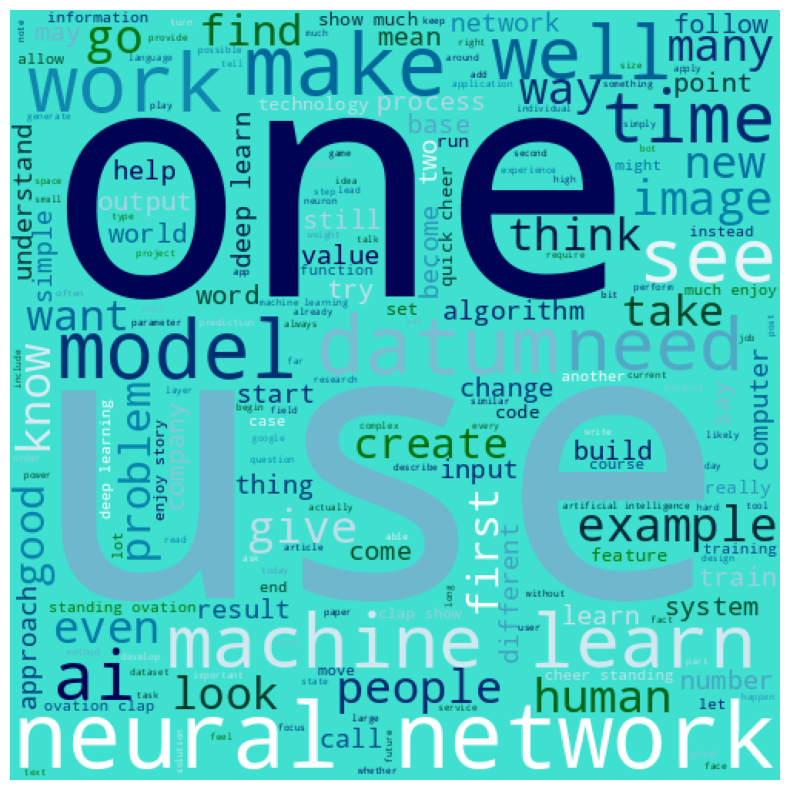

In [ ]:
import wordcloud
from wordcloud import WordCloud

#combine all the articles
article_data = ""
for article in medium_articles.text:
    article_data = article_data+" "+article

#ploting the word cloud
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(width = 500, height = 500, background_color='#40E0D0', colormap="ocean",  random_state=10).generate(article_data)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
#tokenize articles
tokeize_article = medium_articles.text.apply(lambda x : x.split())
id2word = corpora.Dictionary(tokeize_article)

# Create Corpus
texts = tokeize_article

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


#printing 50 words from the text corpus
corpus_example = [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:2]]
corpus_example[0][:50]

[("'", 8),
 ('able', 1),
 ('abruptly', 1),
 ('acceptance', 1),
 ('access', 1),
 ('accident', 1),
 ('accord', 2),
 ('achieve', 2),
 ('adage', 1),
 ('advantage', 1),
 ('agenda', 1),
 ('ageold', 1),
 ('ago', 2),
 ('ai', 3),
 ('aim', 1),
 ('alive', 1),
 ('allow', 1),
 ('allrounder', 1),
 ('along', 1),
 ('also', 1),
 ('alternative', 1),
 ('amount', 1),
 ('analyze', 1),
 ('another', 5),
 ('answer', 1),
 ('anticipate', 1),
 ('anticlimax', 1),
 ('anyone', 1),
 ('anything', 2),
 ('app', 12),
 ('apply', 1),
 ('approach', 3),
 ('arcane', 2),
 ('area', 2),
 ('arise', 1),
 ('around', 3),
 ('asay', 1),
 ('ask', 1),
 ('aspect', 1),
 ('assumption', 1),
 ('attention', 1),
 ('automate', 1),
 ('automated', 1),
 ('available', 1),
 ('average', 1),
 ('away', 2),
 ('back', 3),
 ('baffle', 1),
 ('basic', 1),
 ('basically', 1)]

In [ ]:
# build LDA model for 10 topic
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='symmetric',
                                           per_word_topics=True,
                                           eta = 0.6)

In [ ]:
pprint(lda_model.print_topics())

[(0,
  '0.010*"https" + 0.009*"sheet" + 0.009*"cheat" + 0.005*"numpy" + '
  '0.004*"python" + 0.003*"google" + 0.003*"machine" + 0.003*"library" + '
  '0.003*"matplotlib" + 0.003*"scipy"'),
 (1,
  '0.014*"action" + 0.009*"rcnn" + 0.008*"network" + 0.007*"policy" + '
  '0.006*"agent" + 0.006*"state" + 0.006*"reward" + 0.006*"environment" + '
  '0.006*"learn" + 0.006*"table"'),
 (2,
  '0.006*"machine" + 0.005*"course" + 0.005*"man" + 0.005*"review" + '
  '0.005*"woman" + 0.004*"average" + 0.004*"rating" + 0.004*"learn" + '
  '0.004*"attract" + 0.004*"week"'),
 (3,
  '0.005*"cell" + 0.003*"ion" + 0.003*"postsynaptic" + 0.003*"presynaptic" + '
  '0.003*"axon" + 0.002*"receptor" + 0.002*"synaptic" + 0.002*"terminal" + '
  '0.001*"metabolic" + 0.001*"ltp"'),
 (4,
  '0.023*"de" + 0.010*"la" + 0.009*"en" + 0.008*"que" + 0.005*"para" + '
  '0.004*"el" + 0.004*"l" + 0.004*"et" + 0.004*"como" + 0.004*"se"'),
 (5,
  '0.015*"learn" + 0.013*"deep" + 0.009*"machine" + 0.009*"learning" + '
  '0.005*"c

In [ ]:
doc_lda = lda_model[corpus]

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.280785  0.035578       1        1  46.577410
9     -0.172641 -0.046772       2        1  34.423460
5     -0.063648 -0.100781       3        1   5.951618
2      0.012444 -0.038525       4        1   4.622488
1     -0.053860  0.132597       5        1   4.207272
4      0.148579  0.022356       6        1   1.786450
0      0.081113 -0.010555       7        1   1.463864
6      0.113190 -0.000620       8        1   0.617648
3      0.109716  0.003711       9        1   0.221472
8      0.105893  0.003012      10        1   0.128318, topic_info=           Term         Freq        Total Category  logprob  loglift
1029    network  2730.000000  2730.000000  Default  30.0000  30.0000
335       learn  2091.000000  2091.000000  Default  29.0000  29.0000
949        deep   976.000000   976.000000  Default  28.0000  28.0000
360     machine  1265.000000  1265.000000  Default  27.0000  27.0000
1030     neural  1755.000000  1755.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
4261         不然     0.044756     2.940013  Topic10  -9.1685   2.4735
4262      为了不露怯     0.044756     2.940013  Topic10  -9.1685   2.4735
3695     mining     0.085958    30.857835  Topic10  -8.5159   0.7751
1785    cluster     0.048889   111.340979  Topic10  -9.0802  -1.0724
1304  visualize     0.047361    28.760009  Topic10  -9.1119   0.2495

[599 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
0         1  0.294417             '
0         2  0.681201             '
0         6  0.017319             '
0         7  0.002886             '
2014      1  0.028690             a
...     ...       ...           ...
4260      2  0.340135  一开始还真是摸不太到门道
4261      1  0.340135            不然
4261      2  0.340135            不然
4262      1  0.340135         为了不露怯
4262      2  0.340135         为了不露怯

[1808 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 10, 6, 3, 2, 5, 1, 7, 4, 9])

To measure how good is our model we can use perplexity score and coherence socre. The lower score of perplexity is better for the model.

In [ ]:
# Compute Perplexity
print('\nPerplexity : ', lda_model.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokeize_article, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity :  -7.818276454650203

Coherence Score:  0.4306245111374106


Tuning hyperparameters:¶
We can try out different number of topics, different values of alpha and beta(eta) to increse the conharence score. High conherence score is good for our model.

In [ ]:
def calculate_coherence_score(n, alpha, beta):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=alpha,
                                           per_word_topics=True,
                                           eta = beta)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=tokeize_article, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    return coherence_lda

#list containing various hyperparameters
no_of_topics = [2,5,7,10,12,14]
alpha_list = ['symmetric',0.3,0.5,0.7]
beta_list = ['auto',0.3,0.5,0.7]


for n in no_of_topics:
    for alpha in alpha_list:
        for beta in beta_list:
            coherence_score = calculate_coherence_score(n, alpha, beta)
            print(f"n : {n} ; alpha : {alpha} ; beta : {beta} ; Score : {coherence_score}")

n : 2 ; alpha : symmetric ; beta : auto ; Score : 0.353433037844489
n : 2 ; alpha : symmetric ; beta : 0.3 ; Score : 0.353433037844489
n : 2 ; alpha : symmetric ; beta : 0.5 ; Score : 0.353433037844489


n : 2 ; alpha : symmetric ; beta : 0.7 ; Score : 0.36374370071604456


n : 2 ; alpha : 0.3 ; beta : auto ; Score : 0.353433037844489
n : 2 ; alpha : 0.3 ; beta : 0.3 ; Score : 0.353433037844489
n : 2 ; alpha : 0.3 ; beta : 0.5 ; Score : 0.353433037844489


n : 2 ; alpha : 0.3 ; beta : 0.7 ; Score : 0.36374370071604456


n : 2 ; alpha : 0.5 ; beta : auto ; Score : 0.353433037844489
n : 2 ; alpha : 0.5 ; beta : 0.3 ; Score : 0.353433037844489
n : 2 ; alpha : 0.5 ; beta : 0.5 ; Score : 0.353433037844489


n : 2 ; alpha : 0.5 ; beta : 0.7 ; Score : 0.36374370071604456


n : 2 ; alpha : 0.7 ; beta : auto ; Score : 0.353433037844489
n : 2 ; alpha : 0.7 ; beta : 0.3 ; Score : 0.353433037844489
n : 2 ; alpha : 0.7 ; beta : 0.5 ; Score : 0.353433037844489
n : 2 ; alpha : 0.7 ; beta : 0.7 ; Score : 0.36374370071604456
n : 5 ; alpha : symmetric ; beta : auto ; Score : 0.36706153204569614
n : 5 ; alpha : symmetric ; beta : 0.3 ; Score : 0.36354064958145893
n : 5 ; alpha : symmetric ; beta : 0.5 ; Score : 0.35101867496868655
n : 5 ; alpha : symmetric ; beta : 0.7 ; Score : 0.3327149756014944
n : 5 ; alpha : 0.3 ; beta : auto ; Score : 0.36706153204569614
n : 5 ; alpha : 0.3 ; beta : 0.3 ; Score : 0.36354064958145893
n : 5 ; alpha : 0.3 ; beta : 0.5 ; Score : 0.34774561135216847
n : 5 ; alpha : 0.3 ; beta : 0.7 ; Score : 0.33421448217683103
n : 5 ; alpha : 0.5 ; beta : auto ; Score : 0.3662509886660501
n : 5 ; alpha : 0.5 ; beta : 0.3 ; Score : 0.3661369347335534
n : 5 ; alpha : 0.5 ; beta : 0.5 ; Score : 0.34413369800978266
n : 5 ; alpha : 0.5 ; beta : 0.7 ; S

Final LDA Model

In [ ]:
n = 14
alpha = 0.3
beta = "auto"
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=alpha,
                                           per_word_topics=True,
                                           eta = beta)
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokeize_article, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.416088925391817


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.211177 -0.000849       1        1  29.930091
9      0.133302 -0.025246       2        1  27.946858
1      0.176169  0.054277       3        1   8.396267
5      0.120063 -0.080064       4        1   7.688991
2      0.014175 -0.249233       5        1   5.151699
13     0.047381 -0.027128       6        1   4.238275
0      0.033874 -0.071380       7        1   4.212508
4     -0.013448  0.056326       8        1   3.270422
10    -0.022610  0.058492       9        1   3.206346
3      0.172721  0.193801      10        1   3.198069
12    -0.176877  0.020780      11        1   1.127759
11    -0.235036  0.030274      12        1   0.934456
6     -0.186057  0.013607      13        1   0.655688
8     -0.274834  0.026341      14        1   0.042571, topic_info=                               Term         Freq        Total Category  \
1024                          model  1702.000000  1702.000000  Default   
144                           datum  1893.000000  1893.000000  Default   
1029                        network  3056.000000  3056.000000  Default   
332                           layer  1022.000000  1022.000000  Default   
360                         machine  1722.000000  1722.000000  Default   
...                             ...          ...          ...      ...   
4272  但是看了个开头就被dirichlet分布和几个数学公式打倒     0.008353     1.015317  Topic14   
8041                         others     0.008433     2.163543  Topic14   
7829                      evaluates     0.008434     2.459346  Topic14   
7821                       courtesy     0.008409    30.654662  Topic14   
980                          github     0.008357   140.515702  Topic14   

      logprob  loglift  
1024  30.0000  30.0000  
144   29.0000  29.0000  
1029  28.0000  28.0000  
332   27.0000  27.0000  
360   26.0000  26.0000  
...       ...      ...  
4272  -9.7438   2.9614  
8041  -9.7342   2.2144  
7829  -9.7341   2.0864  
7821  -9.7370  -0.4394  
980   -9.7433  -1.9682  

[936 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
0         1  0.151963     '
0         2  0.734905     '
0         5  0.012456     '
0         7  0.044842     '
0         8  0.054806     '
...     ...       ...   ...
1763      3  0.206094  zero
1763      7  0.036370  zero
1763     10  0.442496  zero
1764      5  0.994262     ×
4910      8  0.976893     ε

[2520 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 10, 2, 6, 3, 14, 1, 5, 11, 4, 13, 12, 7, 9])